In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import readline
import os
from scipy.optimize import curve_fit
from scipy import interpolate
from lmfit import Model


filename='./4FGL_filtered.csv'
sim_file='./simulatedLC.dat'

df = pd.read_csv(filename)
dfs =pd.read_csv(sim_file, sep=' ')

#print(df)
length = len(df)

JD = df['JD']
photon = df['photon']
photon_err = df['err']

dfs.columns = ['time','flux']
JD_sim = dfs['time']
photon_sim = dfs['flux']

# Simulated lightcurve and PSD, PDF

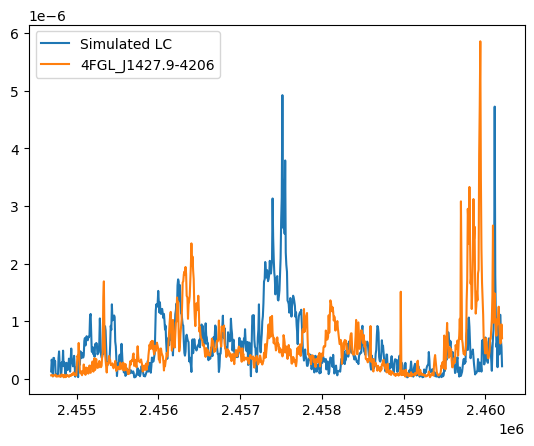

In [2]:
plt.plot(JD_sim, photon_sim, label='Simulated LC')
plt.plot(JD, photon, label='4FGL_J1427.9-4206')
plt.legend()
plt.show()

In [3]:
delt=30.

dft=np.zeros(length)
f=np.zeros(length)

re=0.
im=0.

mean_photon=np.mean(photon)
pi=np.pi

for i in range(length):
        f[i]=i/(length*delt)
        for j in range(length):
                x=photon[j]-mean_photon
                re=re+(x*np.cos((2.*pi*f[i]*JD[j])))
                im=im+(x*np.sin((2.*pi*f[i]*JD[j])))
        dft[i]=re**2+im**2


print('cal end')


cal end


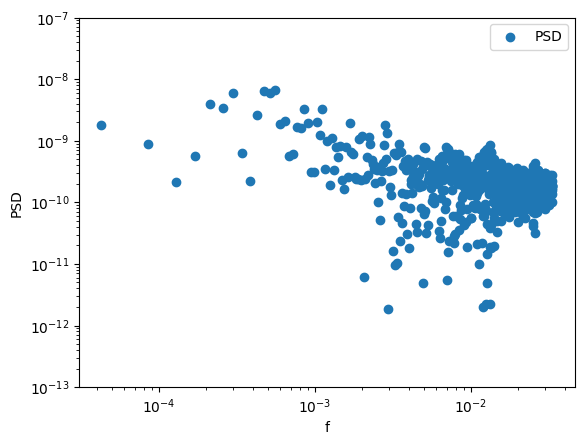

/tmp/ipykernel_9493/2731055882.py:13: RuntimeWarning: divide by zero encountered in log10
  fl=np.log10(f)


In [4]:
plt.scatter(f,dft, label='PSD')

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-13,1e-7)
#plt.ylim(1,-1)
plt.xlabel('f')
plt.ylabel('PSD')
#plt.title('f vs dft')
plt.legend()
plt.show()

fl=np.log10(f)
dftl=np.log10(dft)

fl=np.delete(fl,0)
dftl=np.delete(dftl,0)

-0.332186954161072 -10.357897290170248
0.23685450513965906 0.7573790598715958 -9.18403634627833
-0.6572622992803294 -11.162168193358454
-0.00611302721402085 -9.784509268121782


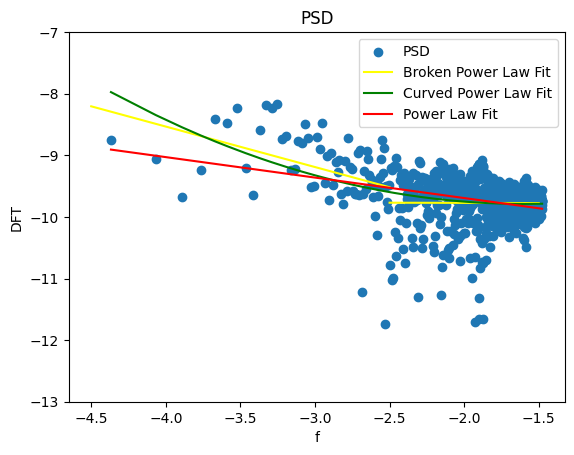

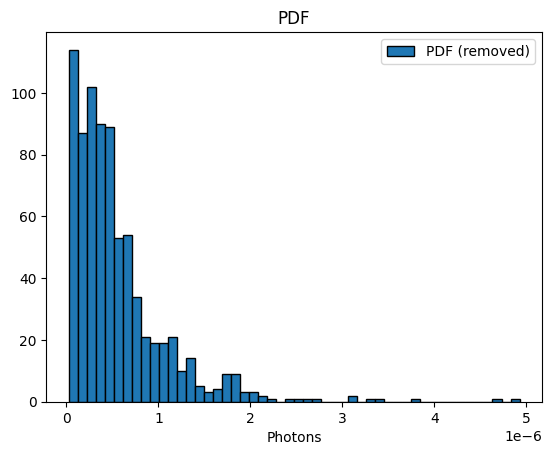

In [5]:
def power_law(x, a, b):
	return a * x + b


params, cov = curve_fit(power_law, fl, dftl)

a, b = params

print(a,b)


def curved_power_law(x, a, b, c):
	return a*x**2 + b*x + c


params_c, cov_c = curve_fit(curved_power_law, fl, dftl)

a_c, b_c, c_c = params_c

print(a_c,b_c,c_c)


def broken_power_law(x,a,b):
        return a*x + b

break_point=-2.5

x1, y1, x2, y2= [],[],[],[]
for i in range(len(fl)):
    if fl[i] < break_point:
        fl1 = fl[i]
        x1.append(fl1)
        dftl1 = dftl[i]
        y1.append(dftl1)
    elif fl[i] > break_point:
        fl2 = fl[i]
        x2.append(fl2)
        dftl2 = dftl[i]
        y2.append(dftl2)       


params1,cov1 = curve_fit(broken_power_law, x1, y1)
params2,cov2 = curve_fit(broken_power_law, x2, y2)  

a1_b, b1_b = params1 
a2_b, b2_b = params2

print(a1_b, b1_b)
print(a2_b, b2_b)

range1 = np.linspace(-4.5,break_point,100)
range2 = np.linspace(break_point,-1.5,100)

plt.scatter(fl, dftl, label='PSD')
plt.plot(range1, power_law(range1, a1_b, b1_b), label='Broken Power Law Fit', color='yellow')
plt.plot(range2, power_law(range2, a2_b, b2_b), color='yellow')
plt.plot(fl, curved_power_law(fl, a_c, b_c, c_c), label='Curved Power Law Fit', color='green')
plt.plot(fl, power_law(fl, a, b), label='Power Law Fit', color='red')
plt.xlabel('f')
plt.ylabel('DFT')
plt.ylim(-13,-7)
plt.title('PSD')
plt.legend()
plt.show()

plt.hist(photon_sim, bins=50, edgecolor='black',label='PDF (removed)')
plt.xlabel('Photons')
plt.ylabel('')
plt.legend()
plt.title('PDF')
plt.show()

# Data removing and PSD, PDF

3.92e-07 5.628049834499837e-07
4.0166511085e-07 5.509228258622312e-07


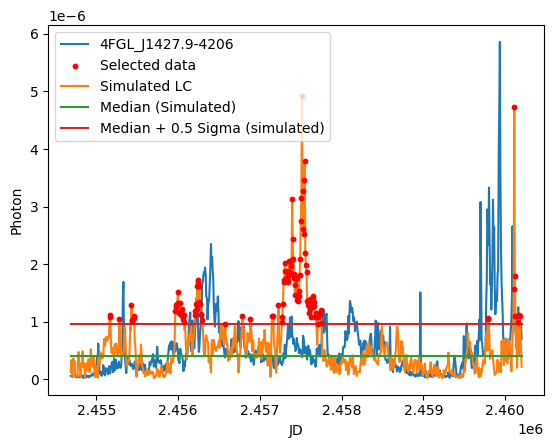

In [6]:
median_photon=np.median(photon)
std_photon=np.std(photon)
print(median_photon, std_photon)

median_photon_sim=np.median(photon_sim)
std_photon_sim=np.std(photon_sim)
print(median_photon_sim, std_photon_sim)

removed_JD_sim=[]
removed_photon_sim=[]
for i in range(length):
    if photon_sim[i] > median_photon_sim + std_photon_sim:
        removed_JD_sim.append(JD_sim[i])
        removed_photon_sim.append(photon_sim[i])

plt.plot(JD, photon, label='4FGL_J1427.9-4206')
plt.scatter(removed_JD_sim, removed_photon_sim, label='Selected data', color='red', s=10, zorder=5)
plt.plot(JD_sim, photon_sim, label='Simulated LC')
#plt.plot([np.min(JD),np.max(JD)],[median_photon,median_photon], label='Median')
#plt.plot([np.min(JD),np.max(JD)],[median_photon+std_photon,median_photon+std_photon], label='Median + 1 sigma')
plt.plot([np.min(JD),np.max(JD)],[median_photon_sim,median_photon_sim], label='Median (Simulated)')
plt.plot([np.min(JD),np.max(JD)],[median_photon_sim+std_photon_sim,median_photon_sim+std_photon_sim], label='Median + 0.5 Sigma (simulated)')
plt.xlabel('JD')
plt.ylabel('Photon')
plt.legend()
plt.show()



In [7]:
delt=30.

length_removed=len(removed_photon_sim)
dft=np.zeros(length_removed)
f=np.zeros(length_removed)

re=0.
im=0.

mean_removed_photon=np.mean(removed_photon_sim)
pi=np.pi

for i in range(length_removed):
        f[i]=i/(length_removed*delt)
        for j in range(length_removed):
                x=removed_photon_sim[j]-mean_removed_photon
                re=re+(x*np.cos((2.*pi*f[i]*removed_JD_sim[j])))
                im=im+(x*np.sin((2.*pi*f[i]*removed_JD_sim[j])))
        dft[i]=re**2+im**2


#print(f, dft, dft2)

#print(dft)
print('cal end')

cal end


/tmp/ipykernel_9493/1803214627.py:1: RuntimeWarning: divide by zero encountered in log10
  fl=np.log10(f)


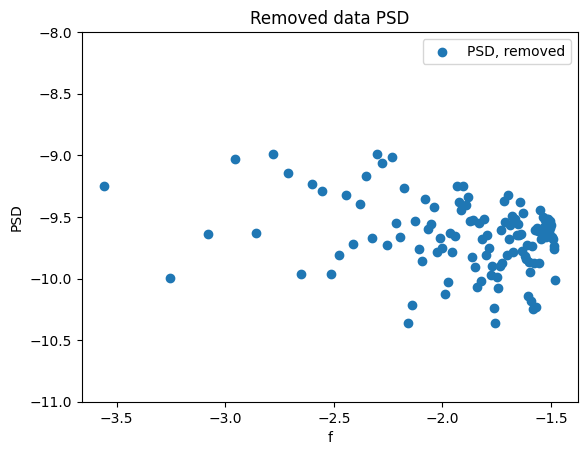

In [8]:
fl=np.log10(f)
dftl=np.log10(dft)

fl=np.delete(fl,0)
dftl=np.delete(dftl,0)

plt.scatter(fl,dftl, label='PSD, removed')

#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(1e-13,1e-7)
plt.ylim(-11,-8)
plt.xlabel('f')
plt.ylabel('PSD')
plt.legend()
plt.title('Removed data PSD')

plt.show()


#print(fl, dftl)

-0.20453398254898378 -10.04641268395274
-0.02968418291358848 -0.3363531094211083 -10.184904505635044
-0.018183780936413374 -9.516682862585046
-0.23839526493031388 -10.107101385659586


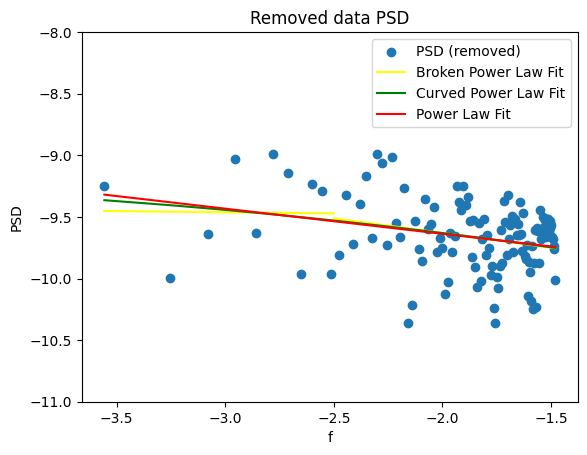

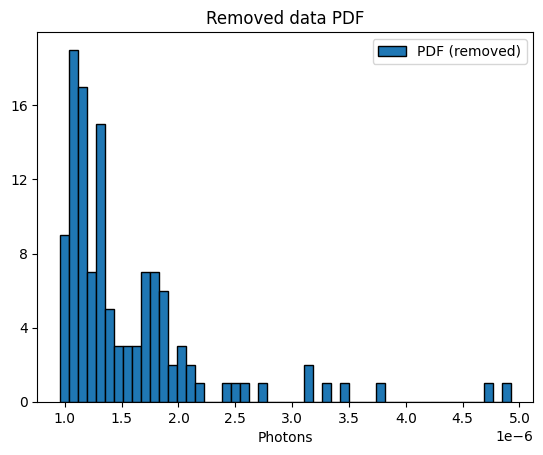

In [9]:
params, cov = curve_fit(power_law, fl, dftl)

a, b = params

print(a,b)


params_c, cov_c = curve_fit(curved_power_law, fl, dftl)

a_c, b_c, c_c = params_c

print(a_c,b_c,c_c)


break_point=-2.5

x1, y1, x2, y2= [],[],[],[]
for i in range(len(fl)):
    if fl[i] < break_point:
        fl1 = fl[i]
        x1.append(fl1)
        dftl1 = dftl[i]
        y1.append(dftl1)
    elif fl[i] > break_point:
        fl2 = fl[i]
        x2.append(fl2)
        dftl2 = dftl[i]
        y2.append(dftl2)       


params1,cov1 = curve_fit(broken_power_law, x1, y1)
params2,cov2 = curve_fit(broken_power_law, x2, y2)  

a1_b, b1_b = params1 
a2_b, b2_b = params2

print(a1_b, b1_b)
print(a2_b, b2_b)

range1 = np.linspace(min(fl),break_point,10)
range2 = np.linspace(break_point,max(fl),10)


plt.scatter(fl, dftl, label='PSD (removed)')
plt.plot(range1, power_law(range1, a1_b, b1_b), label='Broken Power Law Fit', color='yellow')
plt.plot(range2, power_law(range2, a2_b, b2_b), color='yellow')
plt.plot(fl, curved_power_law(fl, a_c, b_c, c_c), label='Curved Power Law Fit', color='green')
plt.plot(fl, power_law(fl, a, b), label='Power Law Fit', color='red')
plt.ylim(-11,-8)
plt.xlabel('f')
plt.ylabel('PSD')
plt.title('Removed data PSD')
plt.legend()
plt.show()

plt.hist(removed_photon_sim, bins=50, edgecolor='black',label='PDF (removed)')
plt.yticks(np.arange(0,20,4))
plt.xlabel('Photons')
plt.ylabel('')
plt.legend()
plt.title('Removed data PDF')
plt.show()

# Interpolation and its PSD, PDF

In [10]:
print(min(JD), max(JD), max(JD)-min(JD))

2454687 2460203 5516


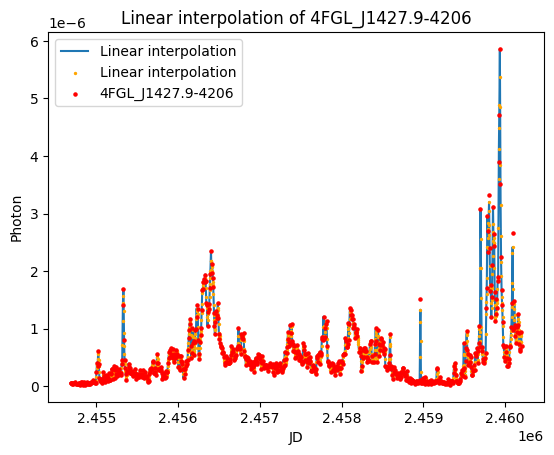

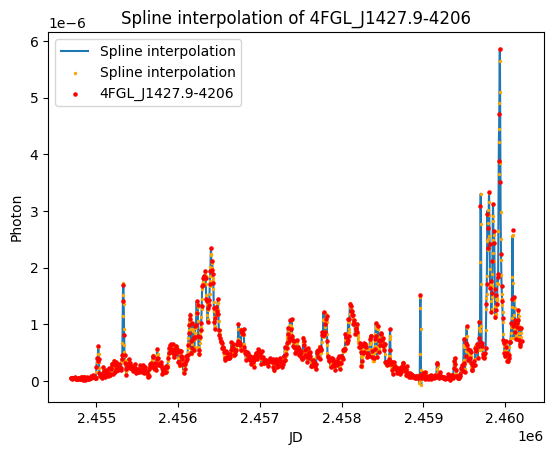

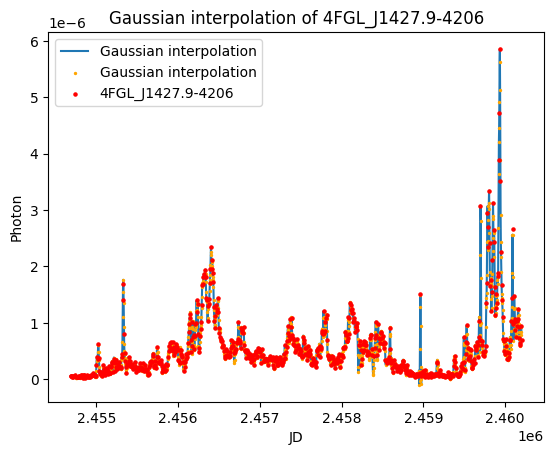

In [11]:
original_linear = interpolate.interp1d(JD, photon, kind='linear')
original_spline = interpolate.interp1d(JD, photon, kind='quadratic')
original_gauss  = interpolate.Rbf(JD, photon, function ='gaussian')

JD_interpolate=np.arange(min(JD),max(JD),3)

plt.plot(JD_interpolate, original_linear(JD_interpolate), label='Linear interpolation')
plt.scatter(JD_interpolate, original_linear(JD_interpolate), label='Linear interpolation', color='orange', s=2, zorder=2)
plt.scatter(JD, photon, label='4FGL_J1427.9-4206', color='red', s=5, zorder=3)
plt.title('Linear interpolation of 4FGL_J1427.9-4206')
plt.xlabel('JD')
plt.ylabel('Photon')
plt.legend()
plt.show()

plt.plot(JD_interpolate, original_spline(JD_interpolate), label='Spline interpolation')
plt.scatter(JD_interpolate, original_spline(JD_interpolate), label='Spline interpolation', color='orange', s=2, zorder=2)
plt.scatter(JD, photon, label='4FGL_J1427.9-4206', color='red', s=5, zorder=3)
plt.title('Spline interpolation of 4FGL_J1427.9-4206')
plt.xlabel('JD')
plt.ylabel('Photon')
plt.legend()
plt.show()

plt.plot(JD_interpolate, original_gauss(JD_interpolate), label='Gaussian interpolation')
plt.scatter(JD_interpolate, original_gauss(JD_interpolate), label='Gaussian interpolation', color='orange', s=2, zorder=2)
plt.scatter(JD, photon, label='4FGL_J1427.9-4206', color='red', s=5, zorder=3)
plt.title('Gaussian interpolation of 4FGL_J1427.9-4206')
plt.xlabel('JD')
plt.ylabel('Photon')
plt.legend()
plt.show()

In [12]:
print(min(removed_JD_sim),max(removed_JD_sim),max(removed_JD_sim)-min(removed_JD_sim))
print(len(removed_photon_sim))

2455163.0 2460183.0 5020.0
120


/home/taehyoung/.local/lib/python3.10/site-packages/scipy/interpolate/_rbf.py:268: LinAlgWarning: Ill-conditioned matrix (rcond=3.89218e-19): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)


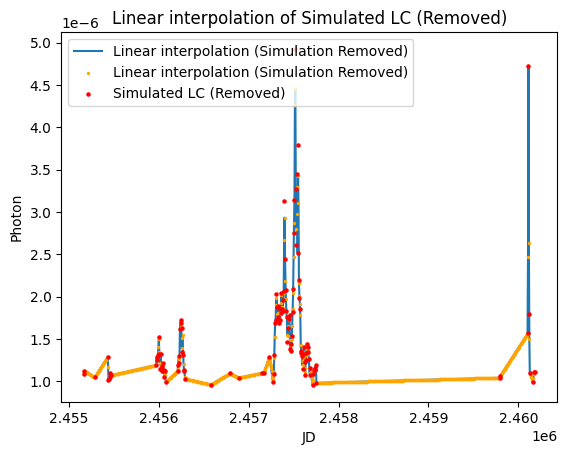

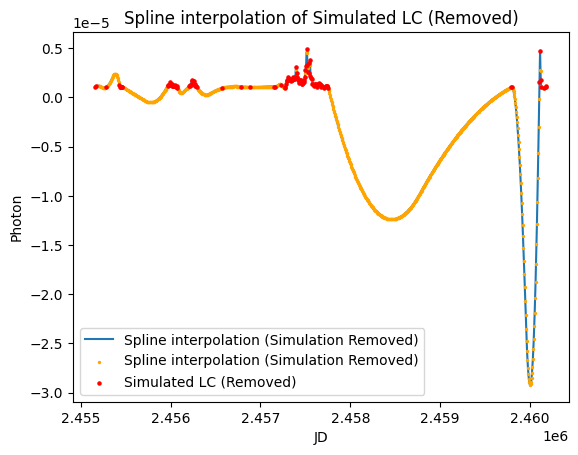

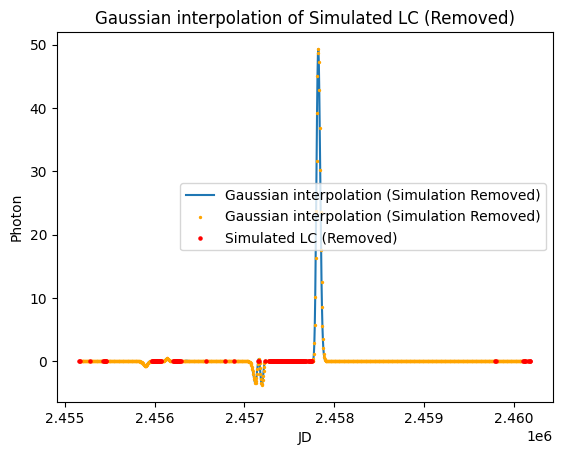

"\nplt.plot(removed_JD_interpolate_sim, sim_spline(removed_JD_interpolate_sim), label='Spline interpolation (Simulation)')\nplt.scatter(removed_JD_interpolate_sim, sim_spline(removed_JD_interpolate_sim), label='Spline interpolation (Simulation)', color='orange', s=2, zorder=2)\nplt.scatter(JD_sim, photon_sim, label='Simulated LC', color='red', s=5, zorder=3)\nplt.xlabel('JD')\nplt.ylabel('Photon')\nplt.legend()\nplt.show()\n"

In [13]:
removed_sim_linear = interpolate.interp1d(removed_JD_sim, removed_photon_sim, kind='linear')
removed_sim_spline = interpolate.interp1d(removed_JD_sim, removed_photon_sim, kind='quadratic')
removed_sim_gauss  = interpolate.Rbf(removed_JD_sim, removed_photon_sim, function ='gaussian')
sim_spline = interpolate.interp1d(JD_sim, photon_sim, kind='quadratic')

removed_JD_interpolate_sim=np.arange(min(removed_JD_sim),max(removed_JD_sim),5)
removed_photon_linear_sim=removed_sim_linear(removed_JD_interpolate_sim)
removed_photon_spline_sim=removed_sim_spline(removed_JD_interpolate_sim)
removed_photon_gauss_sim =removed_sim_gauss(removed_JD_interpolate_sim)

plt.plot(removed_JD_interpolate_sim, removed_photon_linear_sim, label='Linear interpolation (Simulation Removed)')
plt.scatter(removed_JD_interpolate_sim, removed_photon_linear_sim, label='Linear interpolation (Simulation Removed)', color='orange', s=2, zorder=2)
plt.scatter(removed_JD_sim, removed_photon_sim, label='Simulated LC (Removed)', color='red', s=5, zorder=3)
plt.title('Linear interpolation of Simulated LC (Removed)')
plt.xlabel('JD')
plt.ylabel('Photon')
plt.legend()
plt.show()

plt.plot(removed_JD_interpolate_sim, removed_photon_spline_sim, label='Spline interpolation (Simulation Removed)')
plt.scatter(removed_JD_interpolate_sim, removed_photon_spline_sim, label='Spline interpolation (Simulation Removed)', color='orange', s=2, zorder=2)
plt.scatter(removed_JD_sim, removed_photon_sim, label='Simulated LC (Removed)', color='red', s=5, zorder=3)
plt.title('Spline interpolation of Simulated LC (Removed)')
plt.xlabel('JD')
plt.ylabel('Photon')
plt.legend()
plt.show()

plt.plot(removed_JD_interpolate_sim, removed_photon_gauss_sim, label='Gaussian interpolation (Simulation Removed)')
plt.scatter(removed_JD_interpolate_sim, removed_photon_gauss_sim, label='Gaussian interpolation (Simulation Removed)', color='orange', s=2, zorder=2)
plt.scatter(removed_JD_sim, removed_photon_sim, label='Simulated LC (Removed)', color='red', s=5, zorder=3)
plt.title('Gaussian interpolation of Simulated LC (Removed)')
plt.xlabel('JD')
plt.ylabel('Photon')
#plt.ylim(0,6e-6)
plt.legend()
plt.show()
'''
plt.plot(removed_JD_interpolate_sim, sim_spline(removed_JD_interpolate_sim), label='Spline interpolation (Simulation)')
plt.scatter(removed_JD_interpolate_sim, sim_spline(removed_JD_interpolate_sim), label='Spline interpolation (Simulation)', color='orange', s=2, zorder=2)
plt.scatter(JD_sim, photon_sim, label='Simulated LC', color='red', s=5, zorder=3)
plt.xlabel('JD')
plt.ylabel('Photon')
plt.legend()
plt.show()
'''

# ▲Interpolation seems to be inaccurate, due to lack of data▲

In [14]:
delt=30.

length_removed_linear=len(removed_photon_linear_sim)
dft_rm_lin=np.zeros(length_removed_linear)
f_rm_lin=np.zeros(length_removed_linear)

re=0.
im=0.

mean_removed_photon_linear=np.mean(removed_photon_linear_sim)
pi=np.pi

for i in range(length_removed_linear):
        f_rm_lin[i]=i/(length_removed_linear*delt)
        for j in range(length_removed_linear):
                x=removed_photon_linear_sim[j]-mean_removed_photon_linear
                re=re+(x*np.cos((2.*pi*f_rm_lin[i]*removed_JD_interpolate_sim[j])))
                im=im+(x*np.sin((2.*pi*f_rm_lin[i]*removed_JD_interpolate_sim[j])))
        dft_rm_lin[i]=re**2+im**2

#print(dft)
print('cal end')

cal end


/tmp/ipykernel_9493/1880788729.py:1: RuntimeWarning: divide by zero encountered in log10
  fl=np.log10(f_rm_lin)


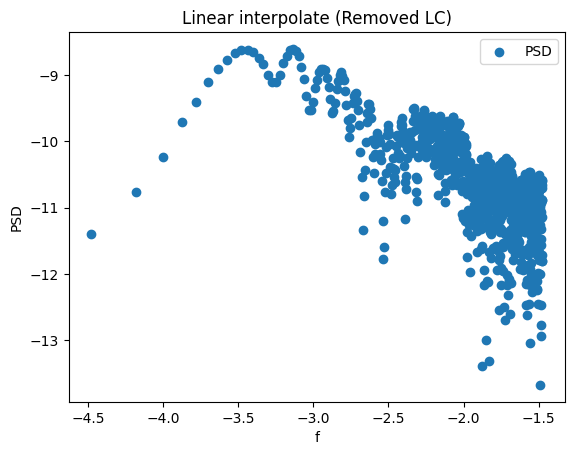

In [15]:
fl=np.log10(f_rm_lin)
dftl=np.log10(dft_rm_lin)

fl=np.delete(fl,0)
dftl=np.delete(dftl,0)

plt.scatter(fl,dftl, label='PSD')

#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(1e-13,1e-7)
#plt.ylim(-11,-8)
plt.xlabel('f')
plt.ylabel('PSD')
plt.legend()
plt.title('Linear interpolate (Removed LC)')

plt.show()


#print(fl, dftl)

-1.1411024822242009 -12.841303159514773
-0.40671558144160613 -3.017275846294665 -14.866612680722936
3.042126950816862 2.0849697717643676
-1.3096835207071034 -13.149209986568495


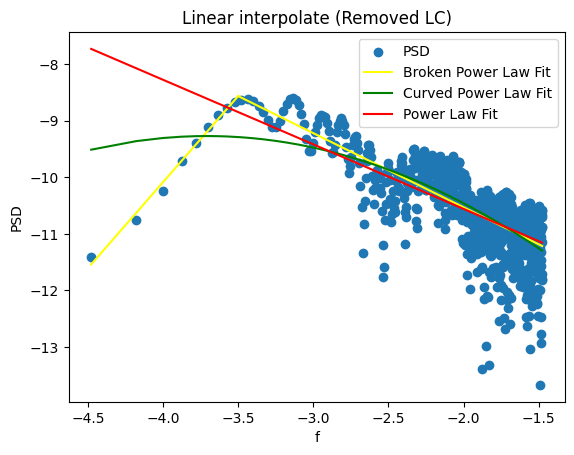

In [16]:
params, cov = curve_fit(power_law, fl, dftl)

a, b = params

print(a,b)


params_c, cov_c = curve_fit(curved_power_law, fl, dftl)

a_c, b_c, c_c = params_c

print(a_c,b_c,c_c)


break_point=-3.5

x1, y1, x2, y2= [],[],[],[]
for i in range(len(fl)):
    if fl[i] < break_point:
        fl1 = fl[i]
        x1.append(fl1)
        dftl1 = dftl[i]
        y1.append(dftl1)
    elif fl[i] > break_point:
        fl2 = fl[i]
        x2.append(fl2)
        dftl2 = dftl[i]
        y2.append(dftl2)       


params1,cov1 = curve_fit(broken_power_law, x1, y1)
params2,cov2 = curve_fit(broken_power_law, x2, y2)  

a1_b, b1_b = params1 
a2_b, b2_b = params2

print(a1_b, b1_b)
print(a2_b, b2_b)

range1 = np.linspace(min(fl),break_point,10)
range2 = np.linspace(break_point,max(fl),10)


plt.scatter(fl, dftl, label='PSD')
plt.plot(range1, power_law(range1, a1_b, b1_b), label='Broken Power Law Fit', color='yellow')
plt.plot(range2, power_law(range2, a2_b, b2_b), color='yellow')
plt.plot(fl, curved_power_law(fl, a_c, b_c, c_c), label='Curved Power Law Fit', color='green')
plt.plot(fl, power_law(fl, a, b), label='Power Law Fit', color='red')
plt.title('Linear interpolate (Removed LC)')
#plt.ylim(-11,-8)
plt.xlabel('f')
plt.ylabel('PSD')
plt.legend()
plt.show()

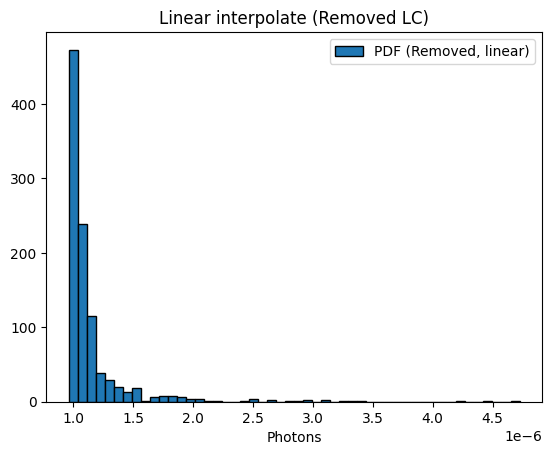

In [17]:
plt.hist(removed_photon_linear_sim, bins=50, edgecolor='black',label='PDF (Removed, linear)')
#plt.yticks(np.arange(0,20,4))
plt.title('Linear interpolate (Removed LC)')
plt.xlabel('Photons')
plt.ylabel('')
plt.legend()
plt.show()

In [18]:
delt=30.

length_removed_spline=len(removed_photon_spline_sim)
dft_rm_spl=np.zeros(length_removed_spline)
f_rm_spl=np.zeros(length_removed_spline)

re=0.
im=0.

mean_removed_photon_spline=np.mean(removed_photon_spline_sim)
pi=np.pi

for i in range(length_removed_spline):
        f_rm_spl[i]=i/(length_removed_spline*delt)
        for j in range(length_removed_spline):
                x=removed_photon_spline_sim[j]-mean_removed_photon_spline
                re=re+(x*np.cos((2.*pi*f_rm_spl[i]*removed_JD_interpolate_sim[j])))
                im=im+(x*np.sin((2.*pi*f_rm_spl[i]*removed_JD_interpolate_sim[j])))
        dft_rm_spl[i]=re**2+im**2

#print(dft)
print('cal end')

cal end


/tmp/ipykernel_9493/4208110375.py:1: RuntimeWarning: divide by zero encountered in log10
  fl=np.log10(f_rm_spl)


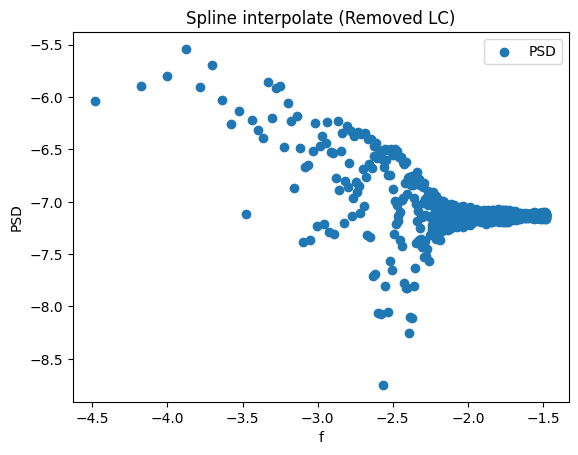

In [19]:
fl=np.log10(f_rm_spl)
dftl=np.log10(dft_rm_spl)

fl=np.delete(fl,0)
dftl=np.delete(dftl,0)

plt.scatter(fl,dftl, label='PSD')

#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(1e-13,1e-7)
#plt.ylim(-11,-8)
plt.xlabel('f')
plt.ylabel('PSD')
plt.legend()
plt.title('Spline interpolate (Removed LC)')

plt.show()


#print(fl, dftl)

-0.30913952946250534 -7.6777448037811045
0.273954328600973 0.9546080116259764 -6.313542553415203
-0.785846899497439 -8.974055093511987
-0.0018951122415746813 -7.135731171976259


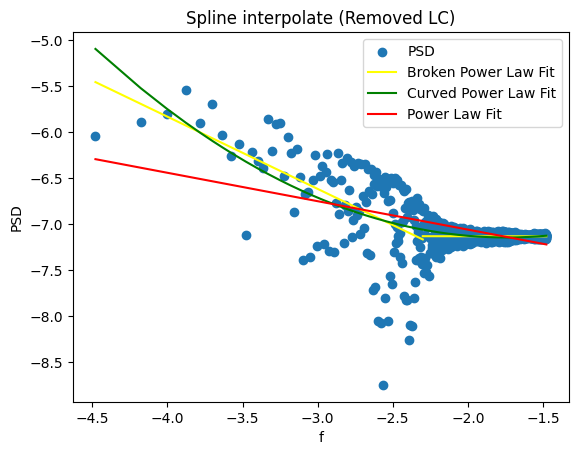

In [20]:
params, cov = curve_fit(power_law, fl, dftl)

a, b = params

print(a,b)


params_c, cov_c = curve_fit(curved_power_law, fl, dftl)

a_c, b_c, c_c = params_c

print(a_c,b_c,c_c)


break_point=-2.3

x1, y1, x2, y2= [],[],[],[]
for i in range(len(fl)):
    if fl[i] < break_point:
        fl1 = fl[i]
        x1.append(fl1)
        dftl1 = dftl[i]
        y1.append(dftl1)
    elif fl[i] > break_point:
        fl2 = fl[i]
        x2.append(fl2)
        dftl2 = dftl[i]
        y2.append(dftl2)       


params1,cov1 = curve_fit(broken_power_law, x1, y1)
params2,cov2 = curve_fit(broken_power_law, x2, y2)  

a1_b, b1_b = params1 
a2_b, b2_b = params2

print(a1_b, b1_b)
print(a2_b, b2_b)

range1 = np.linspace(min(fl),break_point,10)
range2 = np.linspace(break_point,max(fl),10)


plt.scatter(fl, dftl, label='PSD')
plt.plot(range1, power_law(range1, a1_b, b1_b), label='Broken Power Law Fit', color='yellow')
plt.plot(range2, power_law(range2, a2_b, b2_b), color='yellow')
plt.plot(fl, curved_power_law(fl, a_c, b_c, c_c), label='Curved Power Law Fit', color='green')
plt.plot(fl, power_law(fl, a, b), label='Power Law Fit', color='red')
#plt.ylim(-11,-8)
plt.xlabel('f')
plt.ylabel('PSD')
plt.title('Spline interpolate (Removed LC)')
plt.legend()
plt.show()

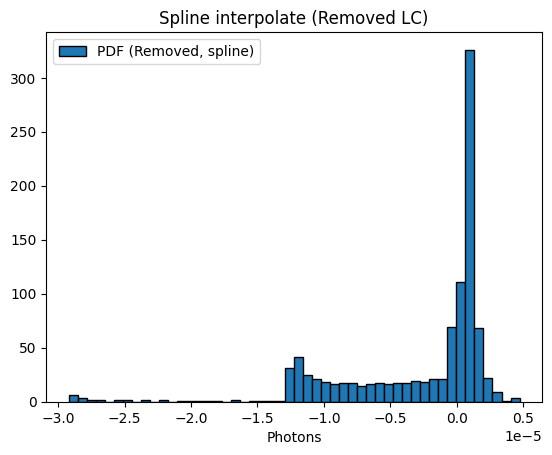

In [21]:
plt.hist(removed_photon_spline_sim, bins=50, edgecolor='black',label='PDF (Removed, spline)')
#plt.yticks(np.arange(0,20,4))
plt.xlabel('Photons')
plt.ylabel('')
plt.legend()
plt.title('Spline interpolate (Removed LC)')
plt.show()

In [22]:
delt=30.

length_removed_gauss=len(removed_photon_gauss_sim)
dft_rm_gauss=np.zeros(length_removed_gauss)
f_rm_gauss=np.zeros(length_removed_gauss)

re=0.
im=0.

mean_removed_photon_gauss=np.mean(removed_photon_gauss_sim)
pi=np.pi

for i in range(length_removed_gauss):
        f_rm_gauss[i]=i/(length_removed_gauss*delt)
        for j in range(length_removed_gauss):
                x=removed_photon_gauss_sim[j]-mean_removed_photon_gauss
                re=re+(x*np.cos((2.*pi*f_rm_spl[i]*removed_JD_interpolate_sim[j])))
                im=im+(x*np.sin((2.*pi*f_rm_spl[i]*removed_JD_interpolate_sim[j])))
        dft_rm_gauss[i]=re**2+im**2

#print(dft)
print('cal end')

cal end


/tmp/ipykernel_9493/1918097987.py:1: RuntimeWarning: divide by zero encountered in log10
  fl=np.log10(f_rm_gauss)


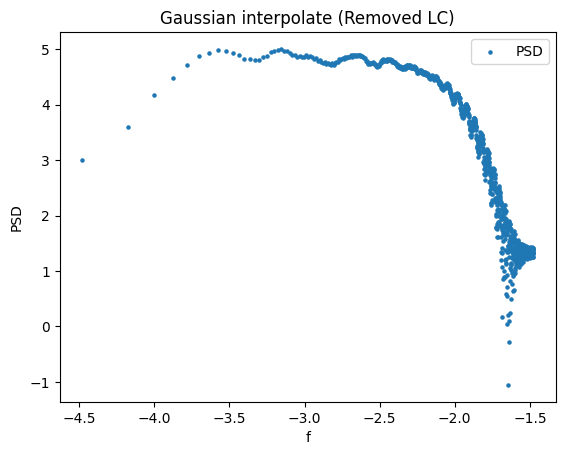

In [23]:
fl=np.log10(f_rm_gauss)
dftl=np.log10(dft_rm_gauss)

fl=np.delete(fl,0)
dftl=np.delete(dftl,0)

plt.scatter(fl,dftl, label='PSD', s=5)

#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(1e-13,1e-7)
#plt.ylim(-11,-8)
plt.xlabel('f')
plt.ylabel('PSD')
plt.legend()
plt.title('Gaussian interpolate (Removed LC)')

plt.show()


#print(fl, dftl)

-2.6725567664373093 -2.2070919526907447
-2.1718981940062116 -12.69149314956462 -13.022428930617988
-0.08742462309835997 4.467960352282757
-6.249541225798765 -8.390931878180321


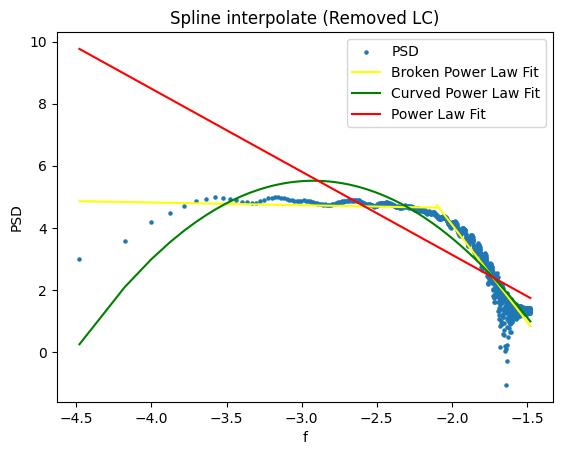

In [24]:
params, cov = curve_fit(power_law, fl, dftl)

a, b = params

print(a,b)


params_c, cov_c = curve_fit(curved_power_law, fl, dftl)

a_c, b_c, c_c = params_c

print(a_c,b_c,c_c)


break_point=-2.1

x1, y1, x2, y2= [],[],[],[]
for i in range(len(fl)):
    if fl[i] < break_point:
        fl1 = fl[i]
        x1.append(fl1)
        dftl1 = dftl[i]
        y1.append(dftl1)
    elif fl[i] > break_point:
        fl2 = fl[i]
        x2.append(fl2)
        dftl2 = dftl[i]
        y2.append(dftl2)       


params1,cov1 = curve_fit(broken_power_law, x1, y1)
params2,cov2 = curve_fit(broken_power_law, x2, y2)  

a1_b, b1_b = params1 
a2_b, b2_b = params2

print(a1_b, b1_b)
print(a2_b, b2_b)

range1 = np.linspace(min(fl),break_point,10)
range2 = np.linspace(break_point,max(fl),10)


plt.scatter(fl, dftl, label='PSD', s=5)
plt.plot(range1, power_law(range1, a1_b, b1_b), label='Broken Power Law Fit', color='yellow')
plt.plot(range2, power_law(range2, a2_b, b2_b), color='yellow')
plt.plot(fl, curved_power_law(fl, a_c, b_c, c_c), label='Curved Power Law Fit', color='green')
plt.plot(fl, power_law(fl, a, b), label='Power Law Fit', color='red')
#plt.ylim(-11,-8)
plt.xlabel('f')
plt.ylabel('PSD')
plt.title('Spline interpolate (Removed LC)')
plt.legend()
plt.show()

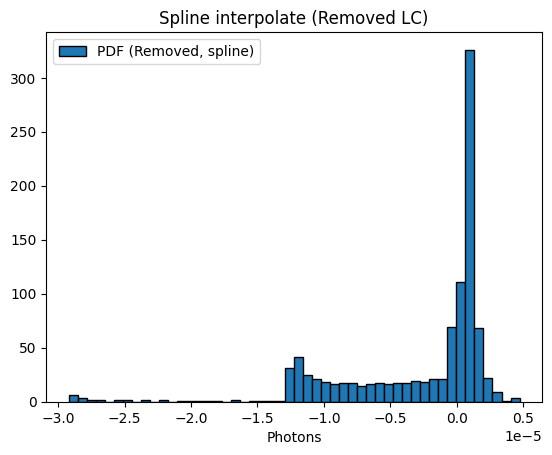

In [25]:
plt.hist(removed_photon_spline_sim, bins=50, edgecolor='black',label='PDF (Removed, spline)')
#plt.yticks(np.arange(0,20,4))
plt.xlabel('Photons')
plt.ylabel('')
plt.legend()
plt.title('Spline interpolate (Removed LC)')
plt.show()